In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import Greens
from getters import LDLFI
pd.set_option('display.expand_frame_repr', False)

import importlib

# Collecting and plotting

## Collecting

Our goal within this notebook is to first collect the information from [this table]("https://lfi.ch/resultate/resultate-en.php?auswNr=434&befNr=96&fldSearch=&invNr=550&p=search&regionNr=827&zigrNr=73&prodNr=95&prodItNr=12634232") about the volume within the economic regions, the accessible forests without shrub forest, and during the latest published NFI period classified by conifers and broadleaves.

To fetch the data, we will use the keys that are used in the underlying relational database. To get these keys, we wrote some small functions to help in this.

First, we are interested in the number of our topic:

In [6]:
import getters
getters.LDLFI.getTopicNumbers(printQuery=True)

TypeError: LDLFI.getTopicNumbers() got an unexpected keyword argument 'printQuery'

As you see and mostly likely already knew, there are many. To help with this, one can provide a keyword:

In [15]:
getters.LDLFI.getTopicNumbers(keyword="Volume")

 number                                                name
     21                                              Volume
     21                        Volume per HA of forest area
     23           Total timber volume per HA of forest area
     23                                 Total timber volume
     24                                 Volume of dead wood
     24           Volume of dead wood per HA of forest area
    167                       Volume of bole wood (HG 2000)
    167 Volume of bole wood (HG 2000) per HA of forest area
    211                       Volume of bole wood (HG 2010)
    211 Volume of bole wood (HG 2010) per HA of forest area
    242                            Total timber volume NFI1
    242      Total timber volume NFI1 per HA of forest area
    249                            Volume of dead wood NFI1
    249      Volume of dead wood NFI1 per HA of forest area


And thus we see, that the topic we are interested in has the number "21".

Next for the classification number. The search function supports other languages (specifically French, English, Italian and German), thus we can look up "Laubholz" for the classification unit we are interested (keep in mind, you have to also change the language parameter, or it might fail to fetch any information):

In [25]:

getters.LDLFI.getClassificationNumbers(keyword="Laubholz", language="de")

 number                        name
     96         Nadel- und Laubholz
   2368 Stock: Nadel- oder Laubholz


For the regional classification, we can ask them:

In [11]:
importlib.reload(getters)
getters.LDLFI.getRegionNumbers(language="fr", printQuery=True)

PREFIX cube: <https://cube.link/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>PREFIX nfi: <https://environment.ld.admin.ch/foen/nfi/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>

SELECT ?number ?name
FROM <https://lindas.admin.ch/foen/nfi>
{
  ?prop a nfi:UnitOfReference .
  ?prop schema:name ?name .
  ?prop schema:identifier ?number .
   FILTER(LANG(?name) = 'fr') .
} order by asc(?number) 



 number                        name
     49        Région de production
    366           Région économique
    827                      Canton
    829 Région de forêt protectrice
   2586      Région biogéographique


**Remark**: Biogeographical regions are not yet uploaded on LINDAS!

Finally, we are interested in the unit of evaluation:

In [29]:
getters.LDLFI.getUnitOfEvaluationNumbers()

 number                                                           name
    434                         Accessible forest without shrub forest
    435                                                     Total area
    484                                                         Forest
    531               Accessible forest without shrub forest NFI1/NFI2
    533               Accessible forest without shrub forest NFI2/NFI3
    828                                                   Shrub forest
   1348                                             Accessible forest 
   1429               Accessible forest without shrub forest NFI3/NFI4
   1876           Stockable and accessible forest without shrub forest
   2282               Accessible forest without shrub forest NFI4/NFI5
   2382               Accessible forest without shrub forest NFI1-NFI5
   2604                                               Forest NFI4/NFI5
   2608                                    Accessible forest NFI4/NFI5
   261

**Remark**: as it stands today, only numbers 434 and 2382 are supported, as they are the most-used units of evaluation.

With all of that out of the way, we can fetch the data. This function always fetches data for all NFI periods. For the table above we thus need `topicNumber=73`, `classificationNumber=96`, `regionNumber=827`, and `unitOfEvaluationNumber=434`. An optional language parameter can be provided to change the labels' language.

In [43]:
importlib.reload(getters)
data = getters.LDLFI.getData(topicNumber="73", classificationNumber="96", regionNumber="827", unitOfEvaluationNumber="434")
data

,inventoryName,classificationName,regionName,unitOfEvaluationName,topicValue,topicSE
0,NFI2,Conifers and broadleaves,Geneva,Accessible forest without shrub forest,1206186.0,38.0
1,NFI1,Conifers and broadleaves,Geneva,Accessible forest without shrub forest,1208565.0,38.0
2,NFI5,Conifers and broadleaves,Thurgau,Accessible forest without shrub forest,8835957.0,14.0
3,NFI2,Conifers and broadleaves,Thurgau,Accessible forest without shrub forest,10361722.0,11.0
4,NFI4,Conifers and broadleaves,Thurgau,Accessible forest without shrub forest,9611134.0,11.0
...,...,...,...,...,...,...
445,NFI4,Indeterminable,both Basel,Accessible forest without shrub forest,NaN,NaN
446,NFI4,Indeterminable,Bern,Accessible forest without shrub forest,NaN,NaN
447,NFI3,Indeterminable,both Basel,Accessible forest without shrub forest,NaN,NaN
448,NFI5,Indeterminable,both Basel,Accessible forest without shrub forest,NaN,NaN


As you can see, you not only fetch the topic, but it's corresponding standard error as well! The data is returned as a pandas dataframe.

One additional feature is the possibility to also fetch the regional data from Swisstopo. You can do this with the optional parameter `geometry=True`.

In [46]:
gdata = getters.LDLFI.getData(topicNumber="73", classificationNumber="96", regionNumber="827", unitOfEvaluationNumber="434", geometry=True)
gdata

,inventoryName,classificationName,regionName,unitOfEvaluationName,topicValue,topicSE,geometry
0,NFI1,Conifers and broadleaves,Nidwalden,Accessible forest without shrub forest,3697236.0,20.0,"POLYGON ((8.38288 47.00066, 8.38547 46.99834, ..."
1,NFI1,Conifers and broadleaves,Jura,Accessible forest without shrub forest,16065652.0,8.0,"POLYGON ((7.02724 47.50133, 7.03698 47.49750, ..."
2,NFI1,Conifers and broadleaves,St Gallen,Accessible forest without shrub forest,26516143.0,7.0,"POLYGON ((9.55872 47.54189, 9.56110 47.49918, ..."
3,NFI1,Conifers and broadleaves,Ticino,Accessible forest without shrub forest,43170143.0,4.0,"POLYGON ((8.95738 46.63033, 8.96294 46.61816, ..."
4,NFI1,Conifers and broadleaves,Zurich,Accessible forest without shrub forest,20758227.0,7.0,"POLYGON ((8.66961 47.67475, 8.67687 47.67182, ..."
...,...,...,...,...,...,...,...
445,NFI5,Conifers,Appenzell Ausserrhoden,Accessible forest without shrub forest,2474965.0,27.0,"POLYGON ((9.54715 47.46701, 9.54584 47.46404, ..."
446,NFI5,Conifers and broadleaves,Fribourg,Accessible forest without shrub forest,17550079.0,11.0,"MULTIPOLYGON (((6.77307 46.75142, 6.77615 46.7..."
447,NFI5,Conifers and broadleaves,Solothurn,Accessible forest without shrub forest,11902911.0,13.0,"MULTIPOLYGON (((7.69240 47.16411, 7.69450 47.1..."
448,NFI5,Conifers,both Basel,Accessible forest without shrub forest,1898933.0,24.0,"MULTIPOLYGON (((7.69337 47.60065, 7.67175 47.5..."


This Information is returned as a [GeoPandas](https://geopandas.org/en/stable/) dataframe.

## Plotting

As a small example, how this newly fetched data could be plotted, here a quick plot about the volume using the [GeoPandas plotting capabilities](https://geopandas.org/en/stable/docs/user_guide/mapping.html).

/tmp/ipykernel_28379/116472886.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


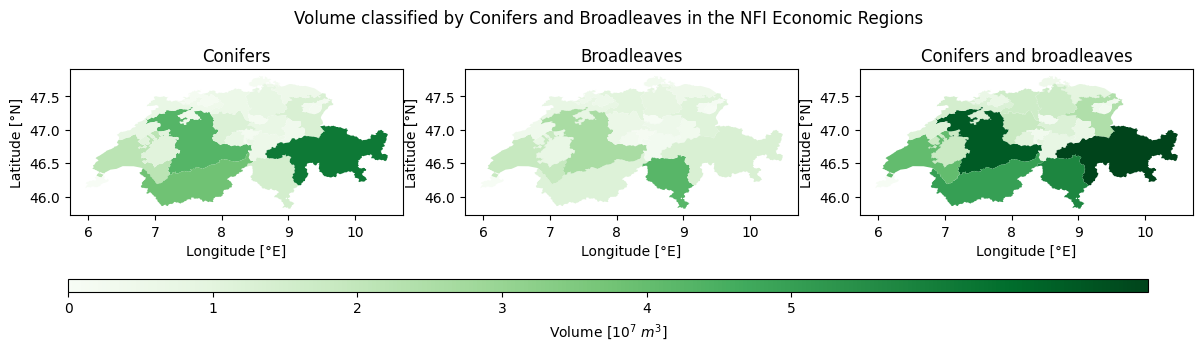

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 2.5))

plotframe = gdata[(gdata.inventoryName == "NFI4") & (gdata.regionName != "Switzerland")]
maxVal = plotframe.topicValue.max()
cax = fig.add_axes([0.05, -0.15, 0.9, 0.05])

for i, classification in enumerate(["Conifers", "Broadleaves", "Conifers and broadleaves"]):
    ax = plotframe[plotframe.classificationName == classification].plot("topicValue", cmap=Greens, ax=axs[i], vmin=0, vmax=maxVal, cax=cax, legend=True, legend_kwds={'orientation': 'horizontal', 'label': 'Volume [$10^7~m^3$]', 'ticks': [0, 1e7, 2e7, 3e7, 4e7, 5e7]})
    cax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
    ax.title.set_text(classification)
    ax.set_aspect('equal')
    ax.set_xlabel('Longitude [°E]')
    ax.set_ylabel('Latitude [°N]')

fig.suptitle("Volume classified by Conifers and Broadleaves in the NFI Economic Regions")

fig.tight_layout()
